In [374]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import matplotlib.pyplot as plt
import json
%matplotlib inline


In [375]:
from sklearn.feature_selection import SelectKBest
from sklearn.cross_validation import train_test_split

In [129]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # Setup map and marker
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot all samples
    X_test, y_test = X[test_idx, :], y[test_idx]
    for idx, c1 in enumerate(np.unique(y)):
        plt.scatter(x=X[y == c1, 0], y=X[y == c1, 1],
                   alpha=0.8, c=cmap(idx),
                   marker=markers[idx], label=c1)
    
    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='',
                    alpha=1.0, linewidth=1, marker='o', s=55, label='test set')

In [376]:
dataset = pd.read_json('SatCatdata.json')

In [377]:
dataset

,APOGEE,COMMENT,COMMENTCODE,COUNTRY,CURRENT,DECAY,FILE,INCLINATION,INTLDES,LAUNCH,...,OBJECT_ID,OBJECT_NAME,OBJECT_NUMBER,OBJECT_TYPE,PERIGEE,PERIOD,RCSVALUE,RCS_SIZE,SATNAME,SITE
0,863,NaN,NaN,US,Y,NaN,6129,98.78,2000-055PV,2000-09-21,...,2000-055PV,NOAA 16 DEB,41715,DEBRIS,842,101.98,0,SMALL,NOAA 16 DEB,AFWTR
1,888,NaN,NaN,US,Y,NaN,6129,98.89,2000-055PS,2000-09-21,...,2000-055PS,NOAA 16 DEB,41712,DEBRIS,816,101.97,0,SMALL,NOAA 16 DEB,AFWTR
2,1299,NaN,NaN,US,Y,NaN,6108,90.30,1965-027M,1965-04-03,...,1965-027M,OPS 4682 DEB,14515,DEBRIS,1255,111.09,0,SMALL,OPS 4682 DEB,AFWTR
3,607,NaN,NaN,US,Y,NaN,6123,98.12,1978-026JD,1978-03-05,...,1978-026JD,DELTA 1 DEB,37642,DEBRIS,555,96.29,0,SMALL,DELTA 1 DEB,AFWTR
4,2086,NaN,NaN,US,Y,NaN,6113,65.70,1961-015LW,1961-06-29,...,1961-015LW,THOR ABLESTAR DEB *,18651,DEBRIS,925,116.10,0,SMALL,THOR ABLESTAR DEB *,AFETR
5,2499,NaN,5.0,US,Y,NaN,1,64.66,1967-068B,1967-07-14,...,1967-068B,ATLAS CENTAUR R/B,2883,ROCKET BODY,265,113.38,0,None,ATLAS CENTAUR R/B,AFETR
6,1035,NaN,NaN,CIS,Y,NaN,6113,83.21,1981-053MA,1981-06-04,...,1981-053MA,COSMOS 1275 DEB,18640,DEBRIS,900,104.42,0,SMALL,COSMOS 1275 DEB,PKMTR
7,1586,NaN,NaN,GLOB,Y,NaN,6108,52.00,1999-019D,1999-04-15,...,1999-019D,GLOBALSTAR M042,25679,PAYLOAD,1582,117.84,0,LARGE,GLOBALSTAR M042,TTMTR
8,856,NaN,NaN,PRC,Y,NaN,6123,98.70,1990-081DK,1990-09-03,...,1990-081DK,CZ-4 DEB,37623,DEBRIS,822,101.70,0,SMALL,CZ-4 DEB,TSC
9,1297,NaN,NaN,US,Y,NaN,6103,90.30,1965-027AC,1965-04-03,...,1965-027AC,OPS 4682 DEB,18479,DEBRIS,1256,111.08,0,SMALL,OPS 4682 DEB,AFWTR


In [207]:
# dataset.drop(['COMMENT'], axis=1)
# dataset.drop(['COMMENTCODE'], axis=1)
dataset.columns

Index(['APOGEE', 'COMMENT', 'COMMENTCODE', 'COUNTRY', 'CURRENT', 'DECAY',
       'FILE', 'INCLINATION', 'INTLDES', 'LAUNCH', 'LAUNCH_NUM',
       'LAUNCH_PIECE', 'LAUNCH_YEAR', 'NORAD_CAT_ID', 'OBJECT_ID',
       'OBJECT_NAME', 'OBJECT_NUMBER', 'OBJECT_TYPE', 'PERIGEE', 'PERIOD',
       'RCSVALUE', 'RCS_SIZE', 'SATNAME', 'SITE'],
      dtype='object')

In [378]:
array = dataset.values

In [379]:
countries = dataset.COUNTRY
object_type = dataset.OBJECT_TYPE
radar_cross_section = dataset.RCS_SIZE    # small < .1m^2, medium .1 - 1 m^2, large > 1m^2
apogee = dataset.APOGEE     # km
perigee = dataset.PERIGEE  # km
period = dataset.PERIOD    # minutes
mu = 398600

In [380]:
# Computue the semi-major axis
a = (apogee + perigee)/2.00
v_mean = (np.divide(2*np.pi*a,period*60,  out=np.zeros_like(a), where=a!=0)).reshape(-1,1) # km/s

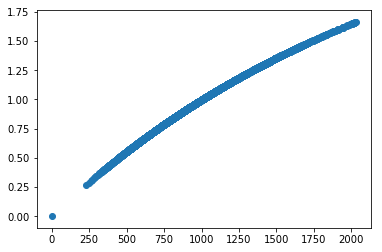

In [381]:
plt.scatter(a,v_mean)

In [382]:
v_mean[0]

array([ 0.87540293])

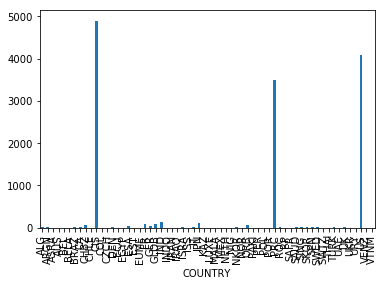

In [383]:
dfcountry = dataset.groupby(['COUNTRY'])['COUNTRY'].count()
dfcountry.plot(kind='bar')
plt.rcParams['figure.figsize'] = (10, 10)

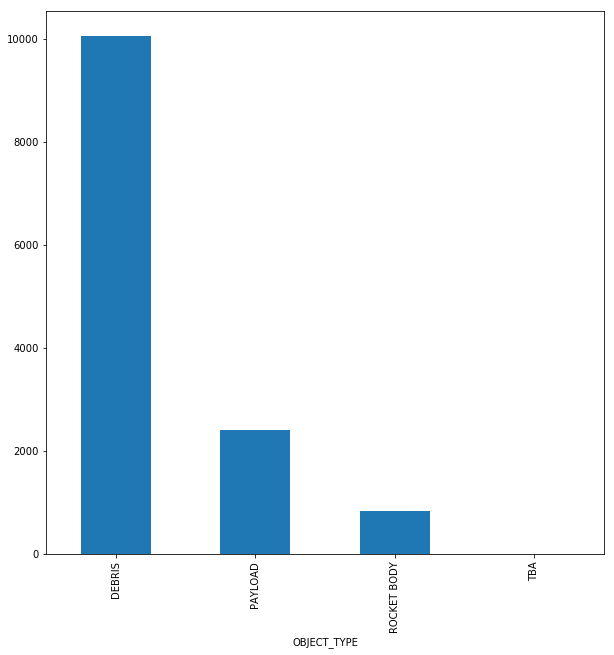

In [384]:
dfobjects = dataset.groupby(['OBJECT_TYPE'])['OBJECT_TYPE'].count()
dfobjects.plot(kind='bar')

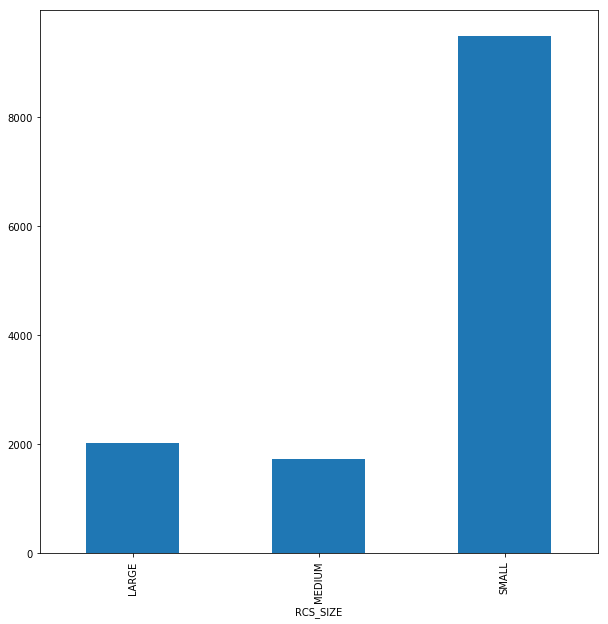

In [12]:
dfobjects = dataset.groupby(['RCS_SIZE'])['RCS_SIZE'].count()
dfobjects.plot(kind='bar')

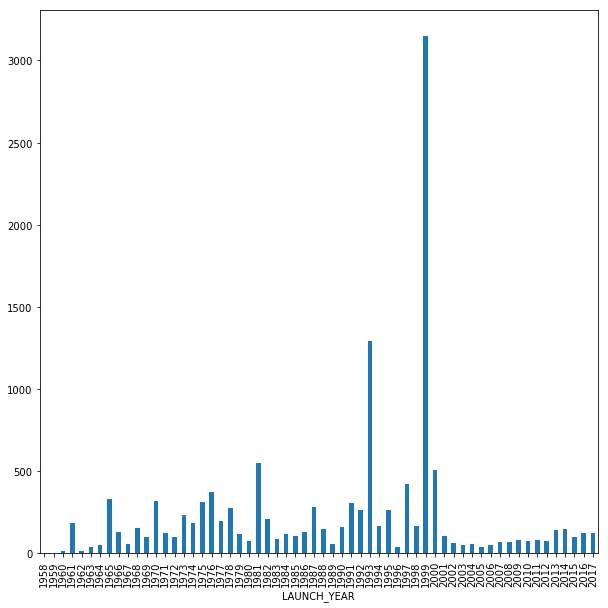

In [13]:
dfobjects = dataset.groupby(['LAUNCH_YEAR'])['LAUNCH_YEAR'].count()
dfobjects.plot(kind='bar')


In [14]:
v_mean.shape

(13299, 1)

In [396]:
orbit_speed = pd.DataFrame(v_mean)
semimajor_axis = pd.DataFrame(a)
semimajor_axis.columns=['semimajor_axis']
orbit_speed.columns=['orbit_speed']
# Standardize data

orbit_speed.head()

,orbit_speed
0,0.875403
1,0.874975
2,1.203773
3,0.631864
4,1.357929


In [386]:
# get the data  for the RCS, mean orbit speed
# clus_data = pd.concat([dataset.RCS_SIZE,dataset.OBJECT_TYPE, orbit_speed], axis=1
# clus_data = pd.concat([dataset.RCS_SIZE,dataset.INCLINATION, orbit_speed], axis=1)

clus_data = pd.concat([dataset.RCS_SIZE, orbit_speed], axis=1)

clus_data.head()


,RCS_SIZE,orbit_speed
0,SMALL,0.875403
1,SMALL,0.874975
2,SMALL,1.203773
3,SMALL,0.631864
4,SMALL,1.357929


In [399]:
obj = pd.concat([dataset.OBJECT_TYPE, orbit_speed], axis=1)
obj_labl = pd.get_dummies(obj[['OBJECT_TYPE', 'orbit_speed']])

obj_labl.head()

,orbit_speed,OBJECT_TYPE_DEBRIS,OBJECT_TYPE_PAYLOAD,OBJECT_TYPE_ROCKET BODY,OBJECT_TYPE_TBA
0,0.875403,1,0,0,0
1,0.874975,1,0,0,0
2,1.203773,1,0,0,0
3,0.631864,1,0,0,0
4,1.357929,1,0,0,0


In [400]:
# Use k-means clustering to cluster the dataset
from sklearn import cluster

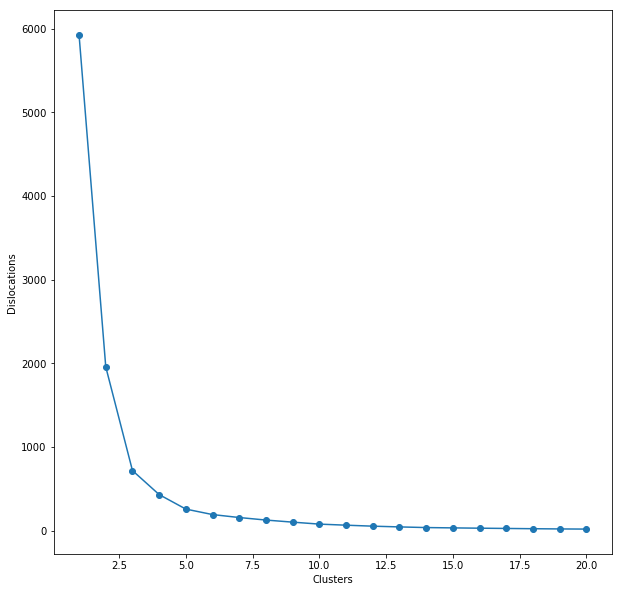

In [401]:
# Find where the number of clusters improve
distortions_obj = []
for i in range(1,21):
    km = cluster.KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0, n_jobs=-1)
    km.fit(obj_labl)
    distortions_obj.append(km.inertia_)
plt.plot(range(1,21), distortions_obj, marker='o')
plt.xlabel('Clusters')
plt.ylabel('Dislocations')
plt.show()

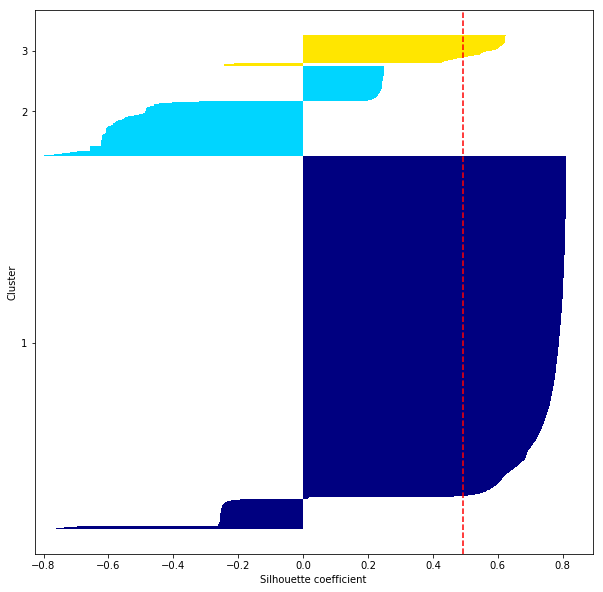

In [402]:
# create a sillouite plot
km = cluster.KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=500, random_state=0, n_jobs=-1)
y_km = km.fit_predict(obj_labl)

from matplotlib import cm
from sklearn.metrics import silhouette_samples
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(labl_data, y_km, metric='euclidean')

y_ax_low, y_ax_up = 0, 0
y_ticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_up += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_low, y_ax_up), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    y_ticks.append((y_ax_low + y_ax_up) / 2) 
    y_ax_low += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color='red', linestyle="--")
plt.yticks(y_ticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

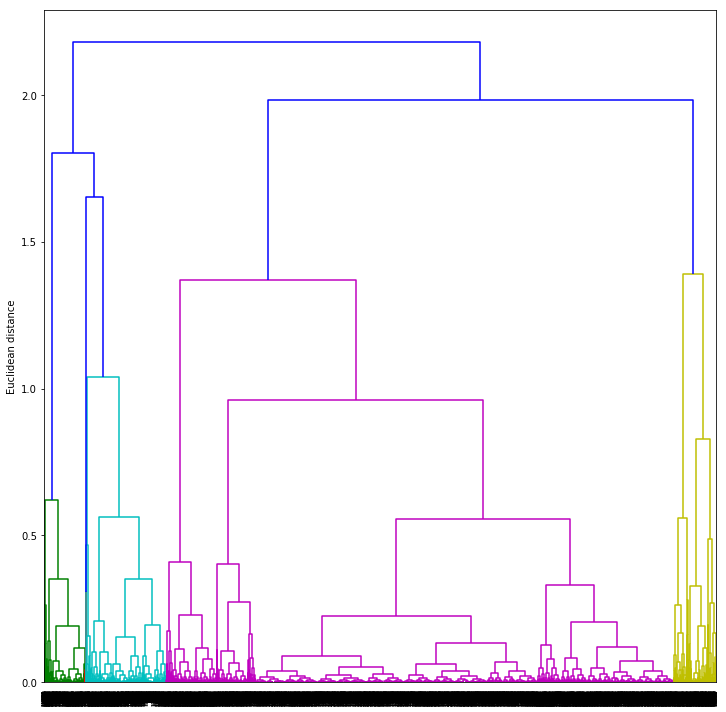

In [404]:
row_clusters = linkage(obj_labl.values,method='complete', metric='euclidean')
row_dendr = dendrogram(row_clusters)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

In [389]:
# Split into training and test data
# X = dataset.RCS_SIZE

# labl_data = pd.get_dummies(clus_data[['RCS_SIZE', 'orbit_speed']])
labl_data = pd.get_dummies(clus_data[['RCS_SIZE','orbit_speed']])

# Y = orbit_speed
labl_data.head()

,orbit_speed,RCS_SIZE_LARGE,RCS_SIZE_MEDIUM,RCS_SIZE_SMALL
0,0.875403,0,0,1
1,0.874975,0,0,1
2,1.203773,0,0,1
3,0.631864,0,0,1
4,1.357929,0,0,1


(<matplotlib.collections.PathCollection at 0x7fc5c25e6550>,)

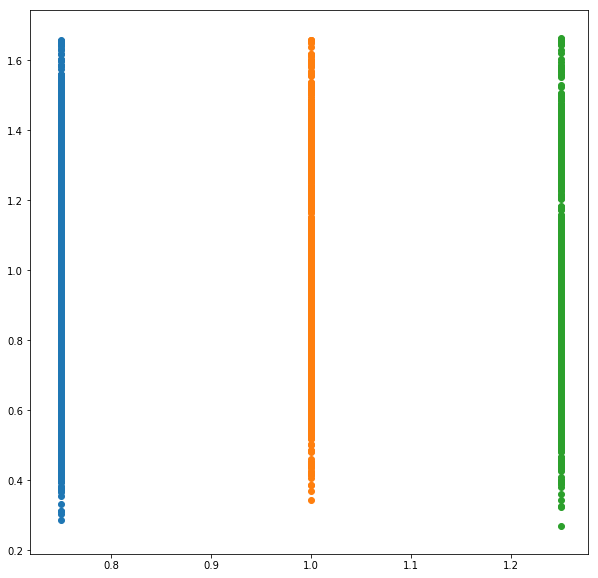

In [392]:
plt.scatter(labl_data.RCS_SIZE_SMALL[labl_data.RCS_SIZE_SMALL == 1] - .25, orbit_speed[labl_data.RCS_SIZE_SMALL == 1])
plt.scatter(labl_data.RCS_SIZE_MEDIUM[labl_data.RCS_SIZE_MEDIUM == 1], orbit_speed[labl_data.RCS_SIZE_MEDIUM == 1]),
plt.scatter(labl_data.RCS_SIZE_LARGE[labl_data.RCS_SIZE_LARGE == 1]+.25, orbit_speed[labl_data.RCS_SIZE_LARGE == 1]),


In [343]:
# Train the dataset using k-means
k_means = cluster.KMeans(n_clusters=3, random_state=0, n_jobs=-1, n_init=10, max_iter=500)
y_km = k_means.fit_predict(labl_data)


In [344]:
# plt.scatter(labl_data[y_km==0,0], labl_data[y_km==0,1], 
#            s=50, c='lightgreen', marker='s', label='cluster 1')
# plt.scatter(labl_data[y_km==1,0], labl_data[y_km==1,1], 
#            s=50, c='lightblue', marker='o', label='cluster 1')
# plt.scatter(labl_data[y_km==2,0], labl_data[y_km==2,1], 
#            s=50, c='orange', marker='v', label='cluster 1')
# plt.scatter(k_means.cluster_centers_[:,0], k_means.cluster_centers_[:,1],
#             s=50, marker='*', c='red', label='centroids')
# plt.legend()
# plt.grid()
# plt.show()

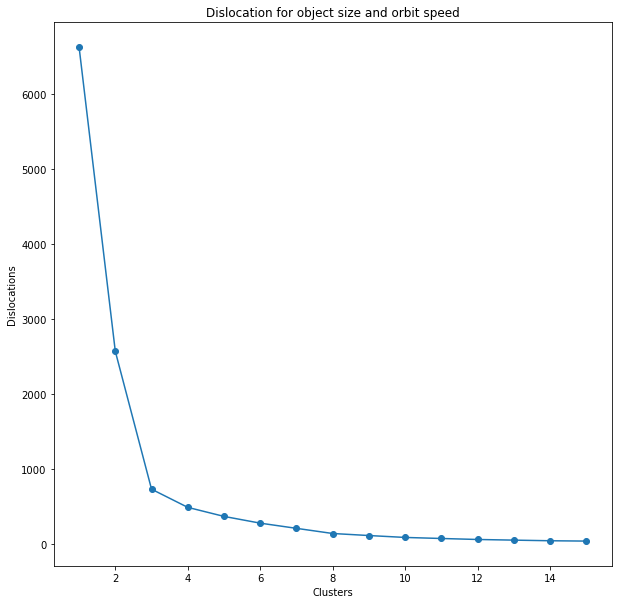

In [345]:
# Find where the number of clusters improve
distortions = []
for i in range(1,16):
    km = cluster.KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0, n_jobs=-1)
    km.fit(labl_data)
    distortions.append(km.inertia_)
plt.plot(range(1,16), distortions, marker='o')
plt.xlabel('Clusters')
plt.ylabel('Dislocations')
plt.title('Dislocation for object size and orbit speed')
plt.show()

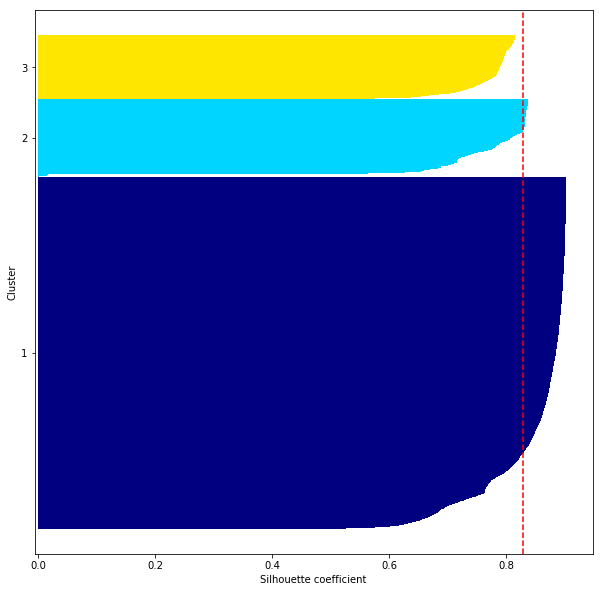

In [346]:
# create a sillouite plot
km = cluster.KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=500, random_state=0, n_jobs=-1)
y_km = km.fit_predict(labl_data)

from matplotlib import cm
from sklearn.metrics import silhouette_samples
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(labl_data, y_km, metric='euclidean')

y_ax_low, y_ax_up = 0, 0
y_ticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_up += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_low, y_ax_up), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    y_ticks.append((y_ax_low + y_ax_up) / 2) 
    y_ax_low += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color='red', linestyle="--")
plt.yticks(y_ticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

TypeError: scatter() missing 1 required positional argument: 'y'

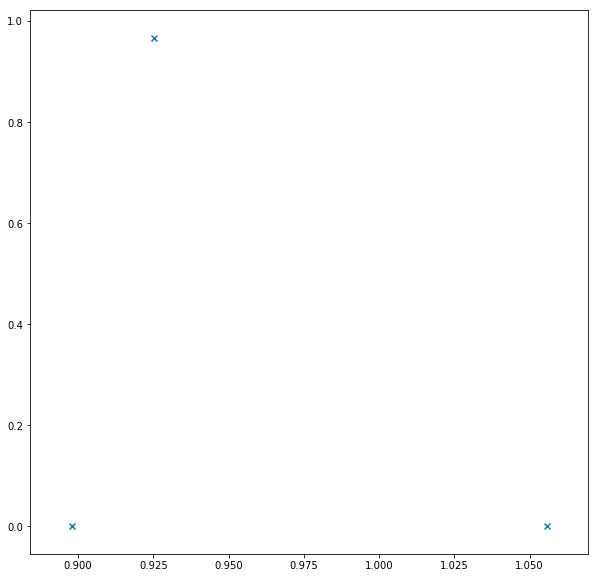

In [347]:
centroids = k_means.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:,1], marker='x' )
plt.scatter(y_km[0])
plt.show()

In [ ]:
# # assignment, cdist = cluster.vq.vq(X_train, Y_train)
# pyplot.scatter(X_train['SMALL'], Y_train)
# pyplot.scatter(Y_train, X_train['MEDIUM'])
# pyplot.scatter(X_train['LARGE'], Y_train)
# pyplot.show()

In [348]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage

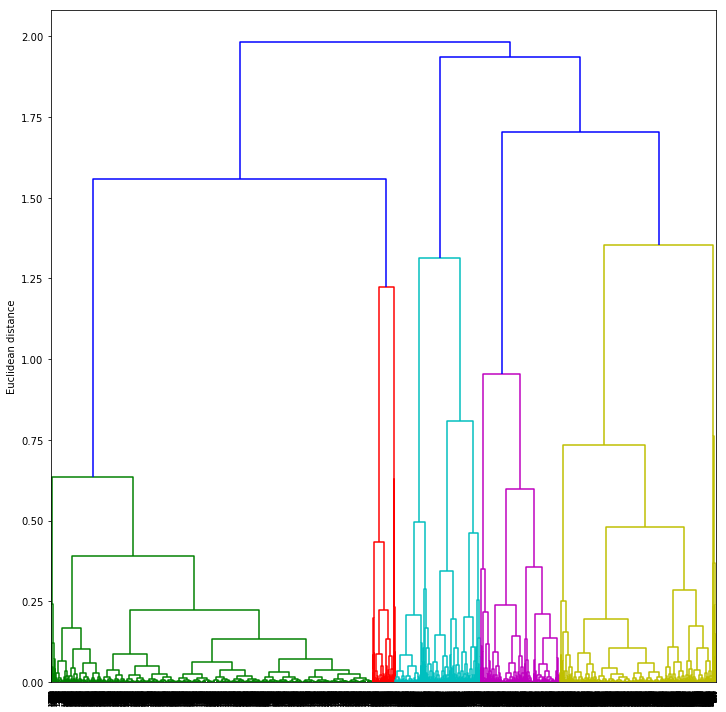

In [405]:
row_clusters = linkage(labl_data.values,method='complete', metric='euclidean')
row_dendr = dendrogram(row_clusters)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

In [350]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
labels = ac.fit_predict(labl_data)
print(labels)

[1 1 0 ..., 2 2 2]
